In [1]:
import pandas as pd

df = pd.read_csv("diamonds.csv")
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,NaN,NaN,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,2,0.21,NaN,E,SI1,59.8,61.0,326.0,3.89,NaN,NaN
2,3,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,4,0.29,Premium,I,NaN,62.4,58.0,NaN,4.20,NaN,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75


In [2]:
pivoting = df.pivot_table(values = "price", index = "cut", columns = "color", aggfunc = "mean")
pivoting

color,D,E,F,G,H,I,J
cut,,,,,,,
Fair,4291.061350,3682.312500,3827.003205,4239.254777,5135.683168,4685.445714,4975.655462
Good,3405.382175,3423.644159,3495.750275,4123.482204,4276.254986,5078.532567,4574.172638
Ideal,2629.094566,2598.132240,3374.939362,3720.706388,3889.334831,4451.970377,4918.186384
Premium,3631.292576,3540.289812,4324.890176,4500.742134,5216.706780,5950.113525,6294.591584
Very Good,3470.467284,3214.652083,3778.820240,3872.753806,4535.390351,5255.879568,5103.513274


In [3]:
pivoting_new = df.pivot(values = "price", index = "cut", columns = "color")
pivoting_new

ValueError: Index contains duplicate entries, cannot reshape

In [4]:
pivot_using_group = df.groupby(['cut','color'])['price'].mean().unstack()
pivot_using_group

color,D,E,F,G,H,I,J
cut,,,,,,,
Fair,4291.061350,3682.312500,3827.003205,4239.254777,5135.683168,4685.445714,4975.655462
Good,3405.382175,3423.644159,3495.750275,4123.482204,4276.254986,5078.532567,4574.172638
Ideal,2629.094566,2598.132240,3374.939362,3720.706388,3889.334831,4451.970377,4918.186384
Premium,3631.292576,3540.289812,4324.890176,4500.742134,5216.706780,5950.113525,6294.591584
Very Good,3470.467284,3214.652083,3778.820240,3872.753806,4535.390351,5255.879568,5103.513274


In [5]:
pivot_using_group1 = df.groupby(['cut','color'])['price'].mean()
pivot_using_group1

cut        color
Fair       D        4291.061350
           E        3682.312500
           F        3827.003205
           G        4239.254777
           H        5135.683168
           I        4685.445714
           J        4975.655462
Good       D        3405.382175
           E        3423.644159
           F        3495.750275
           G        4123.482204
           H        4276.254986
           I        5078.532567
           J        4574.172638
Ideal      D        2629.094566
           E        2598.132240
           F        3374.939362
           G        3720.706388
           H        3889.334831
           I        4451.970377
           J        4918.186384
Premium    D        3631.292576
           E        3540.289812
           F        4324.890176
           G        4500.742134
           H        5216.706780
           I        5950.113525
           J        6294.591584
Very Good  D        3470.467284
           E        3214.652083
           F        377

In [6]:
type(pivot_using_group1)

pandas.core.series.Series

In [7]:
df_melted = df.melt(id_vars=["cut", "color"], value_vars=["price"], var_name="Metric", value_name="Value")
df_melted.head()


,cut,color,Metric,Value
0,NaN,E,price,326.0
1,NaN,E,price,326.0
2,Good,E,price,327.0
3,Premium,I,price,NaN
4,Good,J,price,335.0


In [8]:
df_crosstab = pd.crosstab(df["cut"], df["color"])
print(df_crosstab)


color         D     E     F     G     H     I    J
cut                                               
Fair        163   224   312   314   303   175  119
Good        662   933   909   871   702   522  307
Ideal      2834  3902  3826  4884  3115  2093  896
Premium    1603  2336  2331  2924  2360  1428  808
Very Good  1513  2400  2164  2299  1824  1204  678


In [9]:
import pandas as pd

# Create a sample DataFrame with time-based data
data = {
    "Date": pd.to_datetime([
        "2024-01-01", "2024-01-01", "2024-01-02", 
        "2024-01-02", "2024-01-03", "2024-01-03"
    ]),
    "Product": ["Apple", "Banana", "Apple", "Banana", "Apple", "Banana"],
    "Sales": [100, 80, 150, 90, 200, 120],
    "Region": ["North", "South", "East", "West", "North", "South"]
}

df = pd.DataFrame(data)

# Display the DataFrame
print(df)


        Date Product  Sales Region
0 2024-01-01   Apple    100  North
1 2024-01-01  Banana     80  South
2 2024-01-02   Apple    150   East
3 2024-01-02  Banana     90   West
4 2024-01-03   Apple    200  North
5 2024-01-03  Banana    120  South


In [10]:
# Pivot table: Sum of sales for each product per day
pivot_table = df.pivot_table(values="Sales", index="Date", columns="Product", aggfunc="sum")

# Display the pivot table
print(pivot_table)


Product     Apple  Banana
Date                     
2024-01-01    100      80
2024-01-02    150      90
2024-01-03    200     120


In [11]:
# Resample to get weekly sales sum
weekly_sales = df.set_index("Date").resample("W").sum()

# Display weekly sales
print(weekly_sales)


                                      Product  Sales  \
Date                                                   
2024-01-07  AppleBananaAppleBananaAppleBanana    740   

                                  Region  
Date                                      
2024-01-07  NorthSouthEastWestNorthSouth  


In [12]:
# Resample to get weekly sales sum
weekly_sales = df.set_index("Date").resample("D").sum()

# Display weekly sales
print(weekly_sales)

                Product  Sales      Region
Date                                      
2024-01-01  AppleBanana    180  NorthSouth
2024-01-02  AppleBanana    240    EastWest
2024-01-03  AppleBanana    320  NorthSouth


In [13]:
import pandas as pd

# Create a sample DataFrame
data = {
    "Date": pd.to_datetime(["2024-01-01", "2024-01-05", "2024-02-10", "2024-02-15", "2024-03-20"]),
    "Sales": [100, 150, 200, 250, 300]
}

df = pd.DataFrame(data)

# Extracting time-based features
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Day"] = df["Date"].dt.day
df["Weekday"] = df["Date"].dt.day_name()
df["Week_Number"] = df["Date"].dt.isocalendar().week

print(df)


        Date  Sales  Year  Month  Day    Weekday  Week_Number
0 2024-01-01    100  2024      1    1     Monday            1
1 2024-01-05    150  2024      1    5     Friday            1
2 2024-02-10    200  2024      2   10   Saturday            6
3 2024-02-15    250  2024      2   15   Thursday            7
4 2024-03-20    300  2024      3   20  Wednesday           12


In [14]:
# Filter sales after February 1st, 2024
filtered_df = df[df["Date"] >= "2024-02-01"]
print(filtered_df)


        Date  Sales  Year  Month  Day    Weekday  Week_Number
2 2024-02-10    200  2024      2   10   Saturday            6
3 2024-02-15    250  2024      2   15   Thursday            7
4 2024-03-20    300  2024      3   20  Wednesday           12


In [15]:
# Group by Month and get total sales
monthly_sales = df.groupby(df["Date"].dt.to_period("M"))["Sales"].sum()
print(monthly_sales)


Date
2024-01    250
2024-02    450
2024-03    300
Freq: M, Name: Sales, dtype: int64


In [17]:
# Create a rolling 2-day moving average on Sales
df["Sales_MA"] = df["Sales"].rolling(window=3).mean()
print(df)


        Date  Sales  Year  Month  Day    Weekday  Week_Number  Sales_MA
0 2024-01-01    100  2024      1    1     Monday            1       NaN
1 2024-01-05    150  2024      1    5     Friday            1       NaN
2 2024-02-10    200  2024      2   10   Saturday            6     150.0
3 2024-02-15    250  2024      2   15   Thursday            7     200.0
4 2024-03-20    300  2024      3   20  Wednesday           12     250.0


In [18]:
df["Previous_Sale_Date"] = df["Date"].shift(1)  # Shift previous date
df["Days_Difference"] = (df["Date"] - df["Previous_Sale_Date"]).dt.days
print(df)


        Date  Sales  Year  Month  Day    Weekday  Week_Number  Sales_MA  \
0 2024-01-01    100  2024      1    1     Monday            1       NaN   
1 2024-01-05    150  2024      1    5     Friday            1       NaN   
2 2024-02-10    200  2024      2   10   Saturday            6     150.0   
3 2024-02-15    250  2024      2   15   Thursday            7     200.0   
4 2024-03-20    300  2024      3   20  Wednesday           12     250.0   

  Previous_Sale_Date  Days_Difference  
0                NaT              NaN  
1         2024-01-01              4.0  
2         2024-01-05             36.0  
3         2024-02-10              5.0  
4         2024-02-15             34.0  


In [19]:
# Generate a complete date range from Jan 1 to Mar 31, 2024
date_range = pd.date_range(start="2024-01-01", end="2024-03-31", freq="D")
print(date_range)


DatetimeIndex(['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04',
               '2024-01-05', '2024-01-06', '2024-01-07', '2024-01-08',
               '2024-01-09', '2024-01-10', '2024-01-11', '2024-01-12',
               '2024-01-13', '2024-01-14', '2024-01-15', '2024-01-16',
               '2024-01-17', '2024-01-18', '2024-01-19', '2024-01-20',
               '2024-01-21', '2024-01-22', '2024-01-23', '2024-01-24',
               '2024-01-25', '2024-01-26', '2024-01-27', '2024-01-28',
               '2024-01-29', '2024-01-30', '2024-01-31', '2024-02-01',
               '2024-02-02', '2024-02-03', '2024-02-04', '2024-02-05',
               '2024-02-06', '2024-02-07', '2024-02-08', '2024-02-09',
               '2024-02-10', '2024-02-11', '2024-02-12', '2024-02-13',
               '2024-02-14', '2024-02-15', '2024-02-16', '2024-02-17',
               '2024-02-18', '2024-02-19', '2024-02-20', '2024-02-21',
               '2024-02-22', '2024-02-23', '2024-02-24', '2024-02-25',
      

C:\Users\hp\AppData\Local\Temp\ipykernel_4624\3211781452.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'Date': pd.date_range(start='2023-01-01', periods=12, freq='M'),
C:\Users\hp\Desktop\LMES\DS_ML\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\hp\Desktop\LMES\DS_ML\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\hp\Desktop\LMES\DS_ML\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\hp\Desktop\LMES\DS_ML\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-st

Original Data:
             Sales
Date             
2023-01-31    200
2023-02-28    220
2023-03-31    230
2023-04-30    240
2023-05-31    250
2023-06-30    260
2023-07-31    270
2023-08-31    290
2023-09-30    300
2023-10-31    320
2023-11-30    340
2023-12-31    360


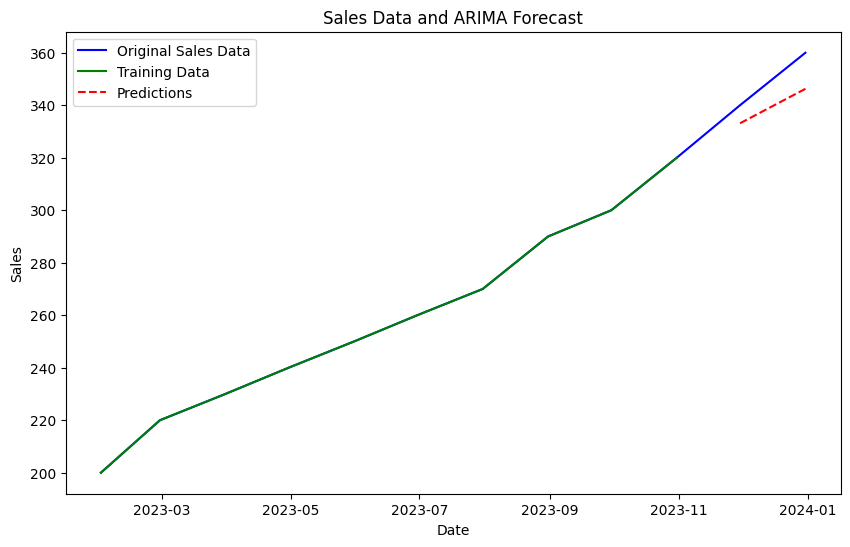

Mean Squared Error: 118.13491965113262
                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   10
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -29.332
Date:                Wed, 05 Feb 2025   AIC                             64.665
Time:                        16:40:43   BIC                             65.256
Sample:                    01-31-2023   HQIC                            63.388
                         - 10-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.001   1118.226      0.000       0.998       1.002
ma.L1         -0.9922      0.797     -1.244      0.213      -2.555       0.571
sigma2       

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# 1. Create a simple time series dataset (e.g., sales data over time)
data = {
    'Date': pd.date_range(start='2023-01-01', periods=12, freq='M'),
    'Sales': [200, 220, 230, 240, 250, 260, 270, 290, 300, 320, 340, 360]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Set the 'Date' column as the index
df.set_index('Date', inplace=True)

# Display the dataset
print("Original Data:\n", df)

# 2. Split the data into train and test sets
train = df[:10]  # First 10 months for training
test = df[10:]   # Last 2 months for testing

# 3. Fit the ARIMA model to the training data (we'll use order (1, 1, 1) as an example)
model = ARIMA(train['Sales'], order=(1, 1, 1))
model_fit = model.fit()

# 4. Make predictions
predictions = model_fit.forecast(steps=len(test))

# 5. Plot the original data, training data, and forecasted data

plt.plot(df.index, df['Sales'], label='Original Sales Data', color='blue')
plt.plot(train.index, train['Sales'], label='Training Data', color='green')
plt.plot(test.index, predictions, label='Predictions', color='red', linestyle='--')
plt.title('Sales Data and ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# 6. Evaluate the model performance
mse = mean_squared_error(test['Sales'], predictions)
print(f'Mean Squared Error: {mse}')

# Print the model summary
print(model_fit.summary())


In [22]:
# Convert DateTime to a different time zone
data = {
    "Date": pd.to_datetime(["2024-01-01", "2024-01-05", "2024-02-10", "2024-02-15", "2024-03-20"]),
    "Sales": [100, 150, 200, 250, 300]
}
df = pd.DataFrame(data)
df["Date_UTC"] = df["Date"].dt.tz_localize("UTC")
df["Date_EST"] = df["Date_UTC"].dt.tz_convert("US/Eastern")
print(df)


        Date  Sales                  Date_UTC                  Date_EST
0 2024-01-01    100 2024-01-01 00:00:00+00:00 2023-12-31 19:00:00-05:00
1 2024-01-05    150 2024-01-05 00:00:00+00:00 2024-01-04 19:00:00-05:00
2 2024-02-10    200 2024-02-10 00:00:00+00:00 2024-02-09 19:00:00-05:00
3 2024-02-15    250 2024-02-15 00:00:00+00:00 2024-02-14 19:00:00-05:00
4 2024-03-20    300 2024-03-20 00:00:00+00:00 2024-03-19 20:00:00-04:00


Original Data:
             Sales
Date             
2023-01-31    200
2023-02-28    220
2023-03-31    230
2023-04-30    240
2023-05-31    250
2023-06-30    260
2023-07-31    270
2023-08-31    290
2023-09-30    300
2023-10-31    320
2023-11-30    340
2023-12-31    360


C:\Users\hp\AppData\Local\Temp\ipykernel_4624\1010754839.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'Date': pd.date_range(start='2023-01-01', periods=12, freq='M'),
C:\Users\hp\Desktop\LMES\DS_ML\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\hp\Desktop\LMES\DS_ML\.venv\Lib\site-packages\statsmodels\tsa\deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


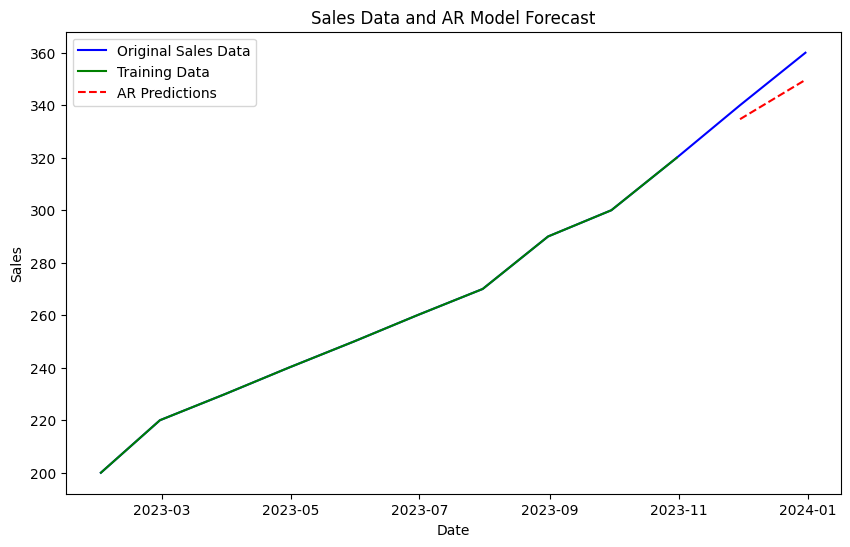

Mean Squared Error: 67.5771723163272
                            AutoReg Model Results                             
Dep. Variable:                  Sales   No. Observations:                   10
Model:                     AutoReg(1)   Log Likelihood                 -26.651
Method:               Conditional MLE   S.D. of innovations              4.675
Date:                Wed, 05 Feb 2025   AIC                             59.302
Time:                        17:37:56   BIC                             59.894
Sample:                    02-28-2023   HQIC                            58.025
                         - 10-31-2023                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.4031     12.837      0.655      0.513     -16.758      33.564
Sales.L1       1.0196      0.051     20.094      0.000       0.920       1.119
               

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg

# 1. Create a simple time series dataset (e.g., sales data over time)
data = {
    'Date': pd.date_range(start='2023-01-01', periods=12, freq='M'),
    'Sales': [200, 220, 230, 240, 250, 260, 270, 290, 300, 320, 340, 360]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Set the 'Date' column as the index
df.set_index('Date', inplace=True)

# Display the dataset
print("Original Data:\n", df)

# 2. Split the data into train and test sets
train = df['Sales'][:10]  # First 10 months for training
test = df['Sales'][10:]   # Last 2 months for testing

# 3. Fit the AutoRegressive (AR) model to the training data
# We use lag=1 for simplicity (you can experiment with other lag values)
model = AutoReg(train, lags=1)
model_fit = model.fit()

# 4. Make predictions
predictions = model_fit.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False)

# 5. Plot the original data, training data, and forecasted data
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Sales'], label='Original Sales Data', color='blue')
plt.plot(train.index, train, label='Training Data', color='green')
plt.plot(test.index, predictions, label='AR Predictions', color='red', linestyle='--')
plt.title('Sales Data and AR Model Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# 6. Evaluate the model performance (Mean Squared Error)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test, predictions)
print(f'Mean Squared Error: {mse}')

# Print the model summary
print(model_fit.summary())


In [ ]:
import pandas as pd

# Create a simple DataFrame
data = {'A': range(1, 11), 'B': range(11, 21)}
df = pd.DataFrame(data)

# Specify the chunk size
chunk_size = 3

# Create a generator to yield chunks
chunks = [df.iloc[i:i + chunk_size] for i in range(0, len(df), chunk_size)]

# Process each chunk
for chunk in chunks:
    # Example operation: filter rows where column 'A' is greater than 5
    filtered_chunk = chunk[chunk['A'] > 5]
    
    # Display the filtered chunk
    print(filtered_chunk)
